In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import (LinearRegression, Ridge, Lasso)

# Data Collection

In [2]:
df= pd.read_csv("house.csv")
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
df.shape

(21613, 21)

In [4]:
# Dropping a few columns.  Waterfront and view are binary. 
df=df.drop(['id','date', 'view', 'waterfront'],axis=1)

In [5]:
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,360000.0,3,2.50,1530,1131,3.0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,400000.0,4,2.50,2310,5813,2.0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,402101.0,2,0.75,1020,1350,2.0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,400000.0,3,2.50,1600,2388,2.0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


In [6]:
df['price']

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64

In [7]:
df.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built',
       'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')

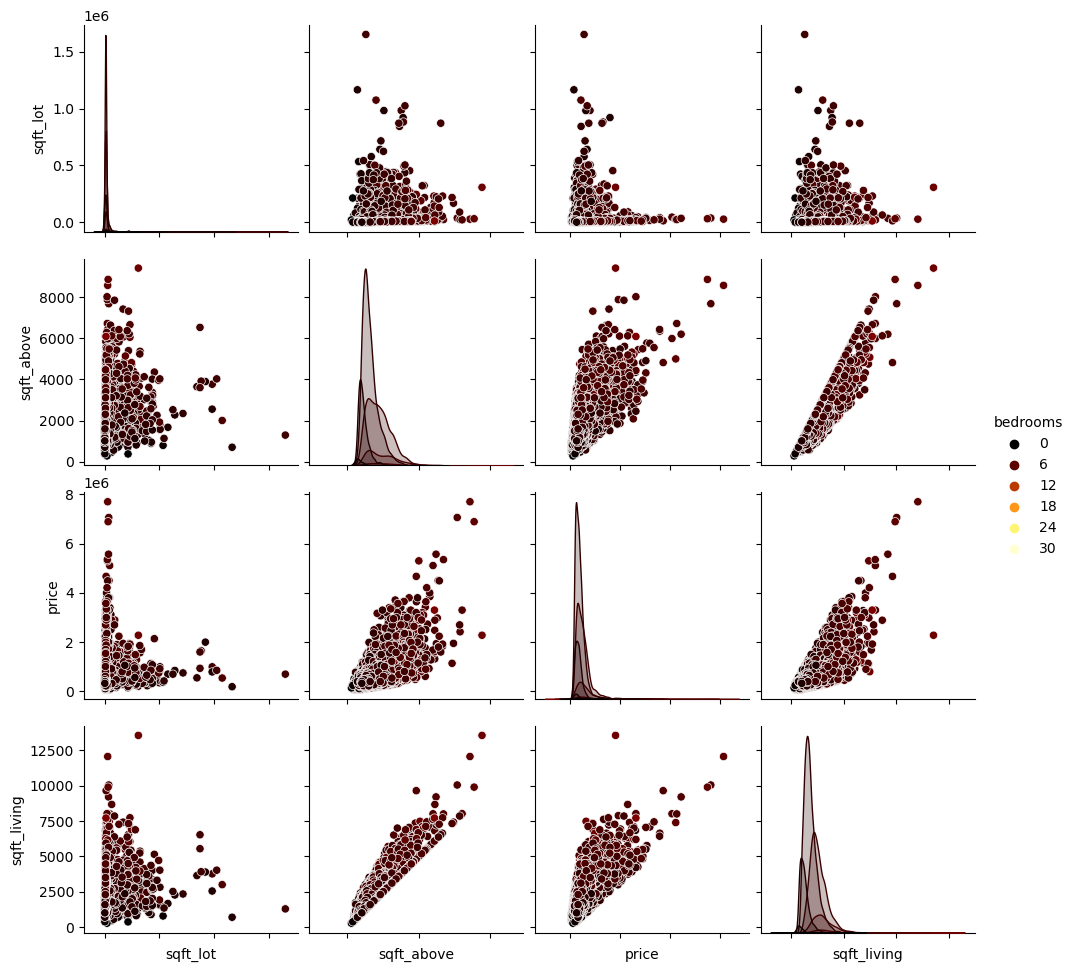

In [8]:
p =sns.pairplot(df[['sqft_lot','sqft_above','price','sqft_living','bedrooms']], hue='bedrooms', palette='afmhot')
p.set(xticklabels=[]) 

In [9]:
# extract our target variable -- House prices -- into an array 
y = df['price'].values
# is an array with the price variable 
y 

array([221900., 538000., 180000., ..., 402101., 400000., 325000.])

In [10]:
# Drop price from the house dataframe 
df =df.drop(['price'], axis=1)

# Create a matrix from the remaining data
X = df

# Store the column/feature names into a list "colnames"
colnames =df.columns

X

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,3,1.00,1180,5650,1.0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,3,2.25,2570,7242,2.0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,1.00,770,10000,1.0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,4,3.00,1960,5000,1.0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,3,2.00,1680,8080,1.0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,3,2.50,1530,1131,3.0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,4,2.50,2310,5813,2.0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,2,0.75,1020,1350,2.0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,3,2.50,1600,2388,2.0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


# MODEL MAKING

1) LASSO (Least Absolute Shrinkage and Selection Operator)

In [18]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import StandardScaler

# Normalize the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create and fit Lasso regression model
lasso= Lasso(alpha=1.0)  # You can adjust the alpha parameter as needed
lasso.fit(X_scaled, y)


C:\Users\kakul\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:631: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.052e+13, tolerance: 2.917e+11
  model = cd_fast.enet_coordinate_descent(


Lasso()

In [17]:

# Compute and print the coefficients
lasso_coef = lasso.coef_
print(lasso_coef)

[-42886.64893426  33156.78943076 237949.11217632   6543.4528229
   5958.97516451  19040.03278198 118954.40579106 -59361.06667347
 -35232.50789809 -83238.16466765  14026.30511124 -25590.69977469
  77032.57816249 -35523.58737166  27617.29003526  -8919.18623104]


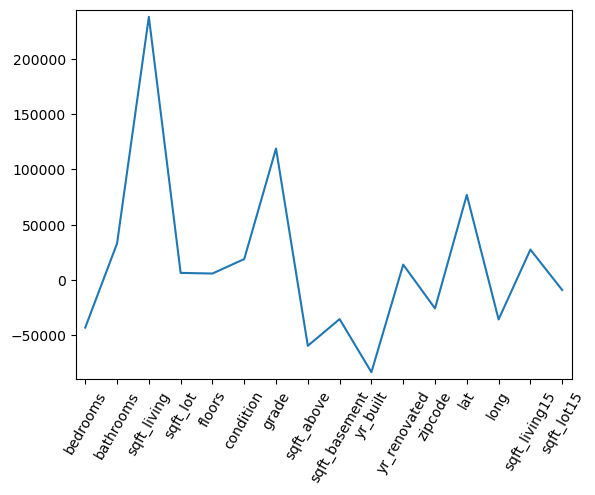

In [19]:
# Plot the coefficients
plt.plot(range(len(colnames)), lasso_coef)
plt.xticks(range(len(colnames)), colnames.values, rotation=60) 
plt.margins(0.02)
plt.show()

# 2) RIDGE

In [21]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

# Normalize the features using StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Create and fit Lasso regression model
ridge= Ridge(alpha=1.0)  # You can adjust the alpha parameter as needed
ridge.fit(X_scaled, y)

Ridge()

In [22]:

# Compute and print the coefficients
ridge_coef = ridge.coef_
print(ridge_coef)

[-42881.46889895  33162.29998786  87120.65123253   6546.44033151
   5960.2052821   19042.31299428 118941.68930841  76615.46001273
  37441.32923719 -83230.50047442  14028.93584515 -25588.06209241
  77031.72917966 -35524.84491659  27631.27220825  -8920.57992363]


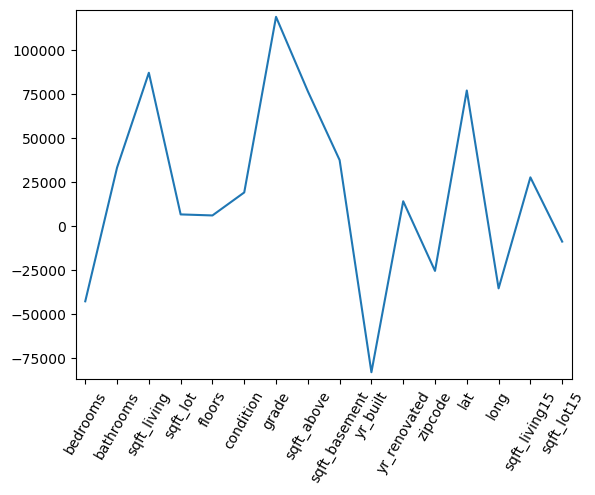

In [23]:
# Plot the coefficients
plt.plot(range(len(colnames)), ridge_coef)
plt.xticks(range(len(colnames)), colnames.values, rotation=60) 
plt.margins(0.02)
plt.show()

# Cross Validation

In [20]:
# Import the necessary module
from sklearn.model_selection import cross_val_score

# Create a linear regression object: reg
reg = LinearRegression()

# Compute 5-fold cross-validation scores: cv_scores
cv_scores = cross_val_score(reg, X, y, cv=5)

# Print the 5-fold cross-validation scores
print(cv_scores)

# find the mean of our cv scores here
print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

[0.6412484  0.65610353 0.66152579 0.6750978  0.65549309]
Average 5-Fold CV Score: 0.657893721422984
